<a href="https://colab.research.google.com/github/jtneumann/DeepLearningWithPython/blob/master/Chapter-03/Exercise_3.4-completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
train_data[0]

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
y_train[0]

1.0

3.4.3 Building the network:

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 186us/step - loss: 0.5986 - acc: 0.6529 - val_loss: 0.5242 - val_acc: 0.7365
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.4115 - acc: 0.8813 - val_loss: 0.3637 - val_acc: 0.8850
Epoch 3/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2715 - acc: 0.9218 - val_loss: 0.3010 - val_acc: 0.8847
Epoch 4/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1990 - acc: 0.9383 - val_loss: 0.2790 - val_acc: 0.8889
Epoch 5/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1558 - acc: 0.9515 - val_loss: 0.2774 - val_acc: 0.8882
Epoch 6/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1275 - acc: 0.9620 - val_loss: 0.2869 - val_acc: 0.8859
Epoch 7/20
15000/15000 [==============================] - 2s 129us/step - 

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

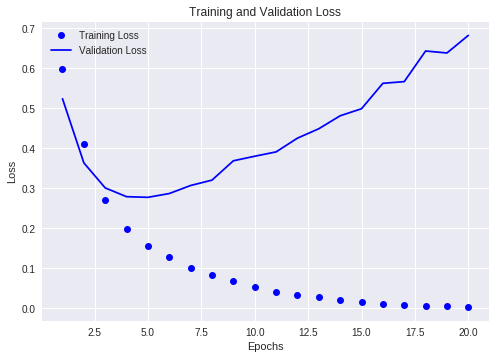

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']  #not included in text, but needed to run

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

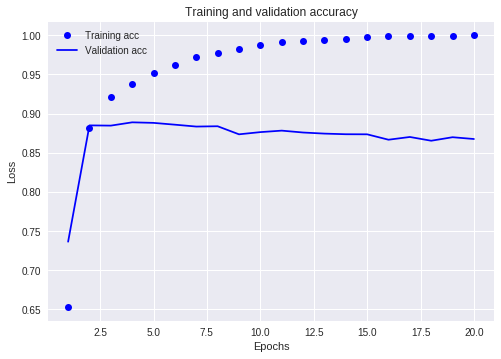

In [0]:
plt.clf()  #clear above figure
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')  #bo = blue dots
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # b = solid blue line
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Graphs showin that we're seeing an overfitting shortly after the 2nd epoch.

In short, the model is learning representations that are specific to the training data and not generalizing to outside data.

* Trying a 4 epoch train for reference:

In [8]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
25000/25000 [==============================] - 5s 188us/step - loss: 0.4496 - acc: 0.8165
Epoch 2/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.2552 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1969 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 2s 98us/step


In [9]:
results


[0.2945873055553436, 0.8832]

use >>> model.predict(x_test)

In [13]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
pred = model.predict(x_test)

Epoch 1/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.4496 - acc: 0.8165
Epoch 2/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2552 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.1969 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 2s 100us/step


In [14]:
results
pred

array([[0.2230874 ],
       [0.9996835 ],
       [0.8147415 ],
       ...,
       [0.19392458],
       [0.06048414],
       [0.5789403 ]], dtype=float32)

In [15]:
results

[0.29458718272686, 0.8832]